# MSc in Artificial Intelligence and Data Science

## 771766- Fundamentals of Data Science
### CENSUS PROJECT


In [1]:
#Importing the required libraries
import numpy as np #for linear algebra/data preprocessing
import pandas as pd #for data preprocessing
import matplotlib.pyplot as plt #For visualization
import seaborn as sns #for visualization
#Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
#read in cencus data
df = pd.read_csv('census_09_new.csv')

# DATA CLEANING

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9979 entries, 0 to 9978
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   9975 non-null   object
 1   Street                         9979 non-null   object
 2   First Name                     9978 non-null   object
 3   Surname                        9979 non-null   object
 4   Age                            9979 non-null   object
 5   Relationship to Head of House  9979 non-null   object
 6   Marital Status                 7525 non-null   object
 7   Gender                         9979 non-null   object
 8   Occupation                     9979 non-null   object
 9   Infirmity                      9979 non-null   object
 10  Religion                       7482 non-null   object
dtypes: object(11)
memory usage: 857.7+ KB


## Age column

In [4]:
df['Age'].unique() #check unique values of column

array(['39', '46', '9', '35', '10', '7', '53', '61', '31', '79', '20',
       '17', '27', '28', '38', '5', '52', '26', '4', '47', '43', '66',
       '23', '19', '14', '71', '41', '36', '22', '3', '12', '8', '48',
       '44', '77', '49', '56', '62', '64', '25', '65', '34', '30', '29',
       '40', '6', '42', '51', '11', '21', '50', '32', '67', '70', '54',
       '57', '72', '16', '13', '59', '15', '45', 'Seven', '74', '55',
       '63', '60', '37', '69', '78', '75', '73', '24', '81', '58', '18',
       '68', '2', '80', '84', '86', '82', '1', '33', '0', '76', '83',
       '90', '87', '85', '98', '88', '2.1', '92', '93', '103', '100',
       '89', '91', '104', '102', '101', '105', '107', '94', '99',
       '63.7497341', '94.94596072', '97', '66.55922257', '67.55922257',
       '49.41583557', '58.30101378', '62.30101378', '275', '0.5',
       '71.47624973', '-1', '91.12782192', '67.10008329', '6.2', 'ONE',
       '3.3'], dtype=object)

In [5]:
df['Age'].replace('ONE','1', inplace = True)
df['Age'].replace('Seven', '7', inplace = True)
df['Age']= df['Age'].astype(float).astype(int)

df[df['Age'] < 0] #check for row with negative age value 
df.loc[8024, 'Age'] = 0 #correct child's age to zero from negative value

df[df['Age'] > 122] #check for row with age value greater than 122
df = df.drop(7231) #drop row with age value greater than 122


In [6]:
df['Age'].describe() #examine descriptive statistics of Age column

count    9978.000000
mean       35.686811
std        21.739822
min         0.000000
25%        18.000000
50%        35.000000
75%        51.000000
max       107.000000
Name: Age, dtype: float64

In [7]:
dfadults = df[df["Age"] >=18] #get dataframe of adults 

dfchildren = df[df["Age"] <18] #get dataframe of children

## Gender Column

In [8]:
df['Gender'].unique() #check unique values of column

array(['Female', 'Male', 'FAMALE', 'MALE', ' ', 'FEMALE', 'F', 'M',
       'Fe-male', 'Ma-le', 'famale', 'male', 'F.'], dtype=object)

In [9]:
#correct all issues with gender column
df['Gender']=df['Gender'].str.capitalize()
df['Gender'].replace('F','Female', inplace = True)
df['Gender'].replace('F.','Female', inplace = True)
df['Gender'].replace('M','Male', inplace = True)
df['Gender'].replace('Famale','Female', inplace = True)
df['Gender'].replace('Fe-male','Female', inplace = True)
df['Gender'].replace('Ma-le','Male', inplace = True)
df['Gender'].replace(' ','Female', inplace = True)


In [10]:
dfmale = df[df["Gender"] =='Male'] #get dataframe of all male
dffemale = df[df["Gender"] =='Female'] #get dataframe of all female

## Marital Status Column

In [11]:
df['Marital Status'].unique() #check unique values of Marital status Column

array(['Married', nan, 'Single', 'Widowed', 'Divorced', ' '], dtype=object)

In [12]:
#df[df['Marital Status'] == np.nan] #attemept to check dataframe of people with nan marital status
h = df[df['Marital Status'].isnull()].index.tolist() #locate rows of people with nan marital status
df['Marital Status'].replace(' ', 'Single', inplace = True) #replace blank entries with single marital status

In [13]:
dfadults["Marital Status"].unique() #check unique values of adult marital status. note no 'nan'
dfchildren['Marital Status'].unique() #check unique values of children marital status
dfchildren[dfchildren['Marital Status'] == 'Married'] #find rows where children are married

'''Possible entry errors'''
df.loc[1966,'Age'] = 20 #replace Amelia's age with a reasonable value. She is a single christian university student who lives alone. 
df.loc[9808,'Age'] = 35 #Joyce is a mother and therefore could not possibly be 3 years old
df.loc[5356,'Age'] = 25 #Dennis is older than 15 because he is married to a 19 year old whom he has a two year old child with. 
df.loc[8894,'Age'] = 46 # Frank who is an Operations geologist and is divorced is obviously older than 6 


dfadults = df[df["Age"] >=18] #update dataframe of adults 
dfchildren = df[df["Age"] <18] #update dataframe of children

x = len(dfchildren) == len(h) #confirm that only children are responsible for nan values
print(x)
df['Marital Status'] = df['Marital Status'].fillna('') #having confirmed that only children are responsible for nan values,
df['Marital Status'].replace('', 'N/A' , inplace = True) #replace nan marital status with N/A(Not applicable)


True


## Religion column


In [14]:
df['Religion'].unique() #check unique values of column

array(['Methodist', nan, 'Christian', 'Catholic', 'None', 'Muslim',
       'Sikh', 'Jewish', 'Orthodoxy', ' ', 'Baptist', 'METHO-DIST',
       'Housekeeper', 'Hindu', 'Private', 'Agnostic', 'CATHOLIC', 'na'],
      dtype=object)

In [15]:
df['Religion'].replace(' ', 'None', inplace = True)
df['Religion'].replace('METHO-DIST', 'Methodist', inplace = True)
df['Religion'].replace('Housekeeper', 'None', inplace = True)
df['Religion'].replace('Private', 'None', inplace = True)
df['Religion']=df['Religion'].str.capitalize()#correct character entry error

print(dfadults['Religion'].unique()) #check unique values of adult religion.
print(dfchildren['Religion'].unique()) #check unique values of children religion(note no one younger than 16 has a religion)

k = dfadults[dfadults['Religion'].isnull()].index.tolist() #locate rows of adults with nan religion
l = dfchildren[dfchildren['Religion'].isnull()].index.tolist() #locate rows of children with nan religion


m = len(l) > len(k) #confirm that children are responsible for most nan values
print(m)


df['Religion'] = df['Religion'].fillna('') #fill all nan values

for indx in k:
    df.loc[indx,'Religion'] = 'None' #convert all adult nan values to 'None'df['Religion']=df['Religion'].str.capitalize()

df['Religion'].replace('', 'N/A' , inplace = True)  #convert all children nan values to 'N/A'      
df['Religion'].replace('Na', 'N/A', inplace = True) #convert all children values to 'N/A'

df['Religion'].unique()

['Methodist' 'Christian' 'Catholic' 'None' 'Muslim' 'Sikh' 'Jewish' nan
 'Orthodoxy' ' ' 'Baptist' 'METHO-DIST' 'Housekeeper' 'Hindu' 'Private'
 'Agnostic' 'CATHOLIC']
[nan 'na']
True


array(['Methodist', 'N/A', 'Christian', 'Catholic', 'None', 'Muslim',
       'Sikh', 'Jewish', 'Orthodoxy', 'Baptist', 'Hindu', 'Agnostic'],
      dtype=object)

## Relationship to Head of House

In [16]:
df['Relationship to Head of House'].unique() #check unique values of people's relationship to the head of House

array(['Head', 'Husband', 'Son', 'Daughter', 'Granddaughter', 'None',
       'Step-Daughter', 'Step-Son', 'Wife', 'Grandson', 'Partner',
       'Lodger', 'Sibling', 'Adopted Daughter', 'Cousin', 'Neice',
       'Nephew', 'Adopted Son', 'Visitor', 'Son-in-law',
       'Adopted Grandson', 'Daughter-in-law'], dtype=object)

In [17]:
df['Relationship to Head of House'].replace('None', 'Lodger', inplace = True) #replace none value to lodger
df['Relationship to Head of House'].replace('Neice', 'Niece', inplace = True) #correct spelling error
dfchildren[dfchildren['Relationship to Head of House'] == 'Head'] #check that children are not head of house

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


## First Name

In [18]:
print(df[df['First Name'].isnull()].index.tolist()) #find nan values in First name
df[df['First Name'] == ' '] #check for blank cells

df[7250:7254] #locate nan value in first name (incorrect entry of both first and last name in last name cell)

df.loc[7252,'First Name'] = 'Leah' #correct issue
df.loc[7252,'Surname'] = 'Harvey' #correct issue

[7252]


age_range = []
for age in df['Age']:
    if age < 16:
        age_range.append('Children')
    elif (age > 15) & (age <= 25):
        age_range.append('16-25')
    elif (age > 25) & (age <= 45):
        age_range.append('25-45')
    elif (age > 45) & (age <= 65):
        age_range.append('45-65')
    else:
        age_range.append('Aged') 



df['Age Group'] = age_range

## House Number

In [19]:
df['House Number'].unique() #check unique values of house number column

array(['ONE', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', ' ', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33',
       '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55',
       '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66',
       '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77',
       '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88',
       '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99',
       '100', '101', '102', '103', '104', '105', '106', '107', '108',
       '109', '110', '111', '112', '113', '114', '115', '116', '117',
       '118', '119', '120', '121', '122', '123', '124', '125', '126',
       '127', '128', '129', '130', '131', '132', '133', '134', '135',
       '136', '137', '138', '139', '140', '141', '142', '143', '14

In [20]:
print(df[df['House Number'].isnull()].index.tolist()) #find null values in House Number column

#locate and correct null value issues
#df[5700: 5705]
#df[8285: 8289]
#df[9798: 9802]
#df[9807: 9811]

df.loc[5703, 'House Number'] = '1' 
df.loc[8287, 'House Number'] = '12' 
df.loc[9800, 'House Number'] = '2' 
df.loc[9809, 'House Number'] = '7' 

[5703, 8287, 9800, 9809]


In [21]:
df[df['House Number']== 'ONE'] #locate problematic row

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,ONE,Bastille Plains,Elizabeth,Marshall,39,Head,Married,Female,Further education lecturer,None,Methodist


In [22]:
df[df['House Number']== 'TWENTY'] #locate problematic row

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4191,TWENTY,Wright Islands,Lynda,Ball,9,Daughter,N/A,Female,Student,None,N/A


In [23]:
df[df['House Number']== ' '] #locate problematic rows

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
71,,Carr Parkways,Leanne,Chambers,47,Head,Married,Female,Airline pilot,None,Methodist
72,,Carr Parkways,Ashley,Chambers,44,Husband,Married,Male,Visual merchandiser,None,Methodist
73,,Carr Parkways,Diana,Chambers,10,Daughter,N/A,Female,Student,None,N/A
74,,Carr Parkways,Catherine,Chambers,3,Daughter,N/A,Female,Child,None,N/A
6225,,Cannontun Drive,Shannon,Baldwin,41,Head,Widowed,Female,Operational investment banker,None,Christian
6226,,Cannontun Drive,Sean,Baldwin,14,Son,N/A,Male,Student,None,N/A


In [24]:
#handle problematic rows
#df[68:76]
#df[6223:6228]
df.loc[0, 'House Number'] = '1'
df.loc[4191, 'House Number'] = '20'
df.loc[71:74, 'House Number'] = '13'
df.loc[6225:6226, 'House Number'] = '13'

## Occupation 

In [25]:
y = df['Occupation'].unique()
for i in y:
    print(i)

Further education lecturer
Physiotherapist
Student
Games developer
Geneticist, molecular
Recycling officer
Press photographer
Retired Surveyor, insurance
University Student
Theatre stage manager
Management consultant
Intelligence analyst
Environmental manager
Teacher, secondary school
Child
Psychotherapist
Rural practice surveyor
Corporate treasurer
Administrator
Education officer, community
Retired Adult guidance worker
Advertising copywriter
Product/process development scientist
Sound technician, broadcasting/film/video
Therapist, occupational
Legal secretary
Recruitment consultant
Archaeologist
Television camera operator
Scientific laboratory technician
Unemployed
Retired Field seismologist
Consulting civil engineer
Telecommunications researcher
Toxicologist
Retired Engineer, petroleum
Banker
Physiological scientist
Animator
Tourism officer
Engineer, energy
Land/geomatics surveyor
Airline pilot
Visual merchandiser
Marine scientist
Public affairs consultant
Music tutor
Stage manager


In [26]:
dfchildren['Occupation'].unique() #check occupation of children

array(['Student', 'Child', ' '], dtype=object)

In [27]:
dfchildren[dfchildren['Occupation'] == ' '] #locate child without occupation value
df.loc[9642, 'Occupation'] = 'Student' #correct occupation status of child to 'Student' because she's of school age
df['Occupation'].replace(' ', 'None', inplace = True) #adults without occupation value are considered unemployed
df['Occupation'].replace('Make', 'None', inplace = True) #invalid value considered as unemployed
df['Occupation'].replace('Copy', 'Copywriter', inplace = True) #correct copy to copywriter
df['Occupation'].replace('Best boy', 'None', inplace = True) #correct copy to copywriter

In [28]:
# determine employment status of the population
es = [] 
for job in df['Occupation']:#for every person
    if job == 'Student': #assess occupation
        es.append('Student') #class student
    elif job == 'University Student':
        es.append('University Student') #class university student
    elif job == 'None':
        es.append('Unemployed') #class unemployed
    elif job == 'Unemployed':
        es.append('Unemployed') #class unemployed
    elif job == 'Child':
        es.append('N/A') #class child
    elif'Retired' in job:
        es.append('Retired') #class retired
    else:
        es.append('Employed')  #class employed
        
df['Employment status'] = es #create new column 'Employment Status'

## Infirmity

In [29]:
df['Infirmity'].unique() #Check unique values of infirmity column

array(['None', 'Physical Disability', 'Blind', ' ', 'Disabled',
       'Mental Disability', 'Deaf', 'Unknown Infection'], dtype=object)

In [30]:
df['Infirmity'].replace(' ', 'None', inplace = True)
infirmities = df.groupby(['Infirmity']).size().reset_index(name='Count')
infirmities

,Infirmity,Count
0,Blind,12
1,Deaf,8
2,Disabled,15
3,Mental Disability,9
4,None,9912
5,Physical Disability,14
6,Unknown Infection,8


***********
# Initial Insights
***********

In [31]:
dfadults = df[df["Age"] >=18] #update dataframe of adults 
dfchildren = df[df["Age"] <18] #update dataframe of children


# class population into age groups based on age and create new column 'Age Group'
df['Age Group'] = pd.cut(x=df['Age']
                         , bins=[-1, 18, 25, 45, 65, 122]
                         , labels=['Children', '18-25', '26-45', '45-65', 'Aged'])

In [32]:
'''Classify population into smaller age groups for population pyramid'''
#create list of age groups across male population
dfmale = df[df["Gender"] =='Male'] #update dataframe of all male

M = [
len(dfmale[dfmale["Age"] <= 8]),
len(dfmale[(dfmale["Age"] > 8) & (dfmale["Age"] <= 17)]), 
len(dfmale[(dfmale["Age"] > 17) & (dfmale["Age"] <= 26)]),
len(dfmale[(dfmale["Age"] > 26) & (dfmale["Age"] <= 35)]),
len(dfmale[(dfmale["Age"] > 35) & (dfmale["Age"] <= 44)]),
len(dfmale[(dfmale["Age"] > 44) & (dfmale["Age"] <= 53)]),
len(dfmale[(dfmale["Age"] > 53) & (dfmale["Age"] <= 62)]),
len(dfmale[(dfmale["Age"] > 62) & (dfmale["Age"] <= 71)]),
len(dfmale[(dfmale["Age"] > 71) & (dfmale["Age"] <= 80)]),
len(dfmale[(dfmale["Age"] > 80) & (dfmale["Age"] <= 89)]),
len(dfmale[(dfmale["Age"] > 89) & (dfmale["Age"] <= 98)]),    
len(dfmale[dfmale["Age"] >98])
]

NM = []#new list to hold negative values of male population sizes
for age in M:
    age = 0 - age
    NM.append(age)
key_male = []
for count in NM:
    key_male.append('Male')

#create list of age groups across female population
dffemale = df[df["Gender"] =='Female'] #update dataframe of all female
F = [
len(dffemale[dffemale["Age"] <= 8]), 
len(dffemale[(dffemale["Age"] > 8) & (dffemale["Age"] <= 17)]), 
len(dffemale[(dffemale["Age"] > 17) & (dffemale["Age"] <= 26)]),
len(dffemale[(dffemale["Age"] > 26) & (dffemale["Age"] <= 35)]),
len(dffemale[(dffemale["Age"] > 35) & (dffemale["Age"] <= 44)]),
len(dffemale[(dffemale["Age"] > 44) & (dffemale["Age"] <= 53)]),
len(dffemale[(dffemale["Age"] > 53) & (dffemale["Age"] <= 62)]),
len(dffemale[(dffemale["Age"] > 62) & (dffemale["Age"] <= 71)]),
len(dffemale[(dffemale["Age"] > 71) & (dffemale["Age"] <= 80)]),
len(dffemale[(dffemale["Age"] > 80) & (dffemale["Age"] <= 89)]),
len(dffemale[(dffemale["Age"] > 89) & (dffemale["Age"] <= 98)]),    
len(dffemale[dffemale["Age"] >98])
]
key_female = []
for count in F:
    key_female.append('Female')
Gender = zip(key_male, key_female)

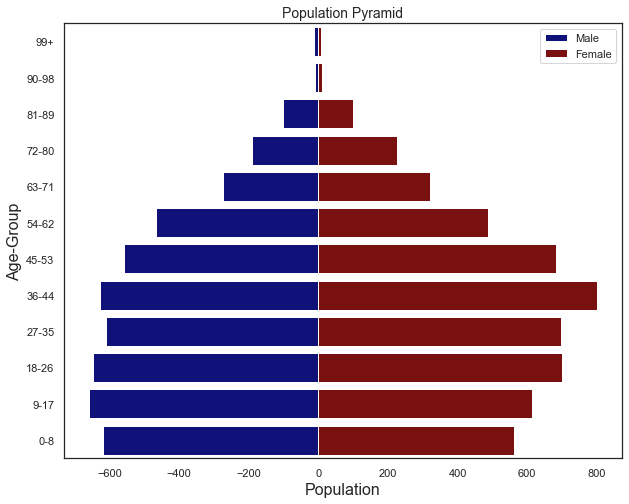

In [33]:
#plot age distribution of population
df_pop = pd.DataFrame({'Age': ['0-8', '9-17', '18-26','27-35','36-44','45-53','54-62','63-71','72-80','81-89','90-98','99+'], 'Male': NM, 'Female': F} )
AgeClass = ['99+','90-98','81-89','72-80','63-71','54-62','45-53','36-44','27-35','18-26','9-17','0-8']

#define figure size
plt.figure(figsize=(10,8))
#display barplots
sns.set_theme(style="white")
bar_plot = sns.barplot(x='Male', y='Age', data=df_pop, order=AgeClass, color='darkblue', label = 'Male')
bar_plot = sns.barplot(x='Female', y='Age', data=df_pop, order=AgeClass, color='darkred', label = 'Female')
bar_plot.legend(loc="best")
plt.ylabel('Age-Group', size=16)
plt.xlabel('Population', size=16)
plt.title("Population Pyramid", size=14)
plt.show()


Text(0.5, 1.0, 'Age vs Marital Status categorized by Age Group')

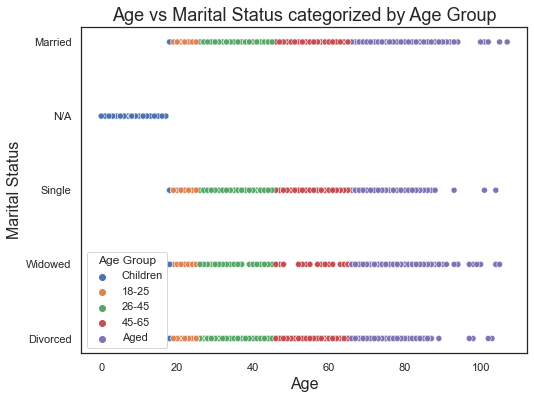

In [34]:
#define figure size
plt.figure(figsize=(8,6))
#display scatterplot
age_ = sns.scatterplot(data= df, x= 'Age', hue= 'Age Group', y= 'Marital Status')
plt.xlabel('Age', size=16)
plt.ylabel('Marital Status', size=16)
plt.title('Age vs Marital Status categorized by Age Group', size=18)

Text(0.5, 1.0, 'Employment status categorized by Age Group')

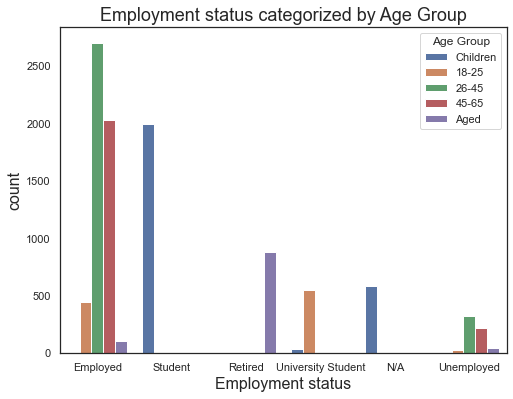

In [35]:
#define figure size
plt.figure(figsize=(8,6))
#display countplot
sns.countplot(data = df
            ,x = 'Employment status'
            ,hue = 'Age Group'
            )
plt.xlabel('Employment status', size=16)
plt.ylabel('count', size=16)
plt.title('Employment status categorized by Age Group', size=18)

Text(0.5, 1.0, 'Age vs Religion')

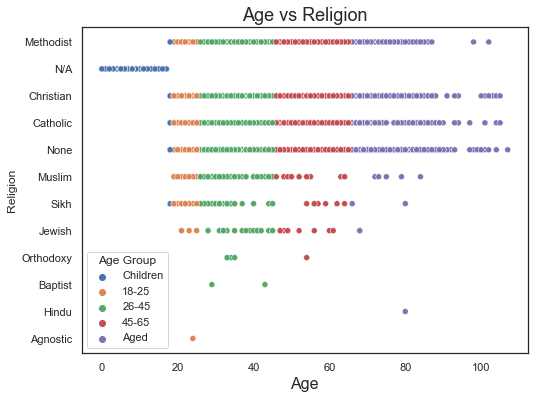

In [36]:
#define figure size
plt.figure(figsize=(8,6))
#display scatterplot
age_ = sns.scatterplot(data= df, x= 'Age', y= 'Religion', hue= 'Age Group')
plt.xlabel('Age', size=16)
plt.title('Age vs Religion', size=18)

***********
# DATA ANALYSIS
************

In [37]:
from pandas_profiling import ProfileReport

In [38]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9978 entries, 0 to 9978
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   House Number                   9978 non-null   object  
 1   Street                         9978 non-null   object  
 2   First Name                     9978 non-null   object  
 3   Surname                        9978 non-null   object  
 4   Age                            9978 non-null   int32   
 5   Relationship to Head of House  9978 non-null   object  
 6   Marital Status                 9978 non-null   object  
 7   Gender                         9978 non-null   object  
 8   Occupation                     9978 non-null   object  
 9   Infirmity                      9978 non-null   object  
 10  Religion                       9978 non-null   object  
 11  Employment status              9978 non-null   object  
 12  Age Group                      997

# Demographics

In [40]:
#Total population of the town 
total_pop = len(df)

#Total population of adults 
adult_population = len(dfadults)

#percentage population of adults in the town
adult_population_percent = (adult_population/total_pop)*100 

#Total population of children 
children_population = len(dfchildren)

#percentage population of children in the town
children_population_percent = (children_population/total_pop)*100 

#Total population of females 
female_population = len(dffemale)

#percentage population of females in the town
female_population_percent = (female_population/total_pop)*100 

#Total population of males 
male_population = len(dfmale)

#percentage population of males in the town
male_population_percent = (male_population/total_pop)*100



'''AGE GROUPS'''
children = dfchildren
_18_to_25 = dfadults[dfadults['Age'] < 26]
_26_to_45 = dfadults[(dfadults['Age'] > 25) & (dfadults['Age'] < 46)]
_46_to_65 = dfadults[(dfadults['Age'] > 45) & (dfadults['Age'] < 66)]
Aged = dfadults[dfadults['Age'] > 65]

'''AGE GROUPS BY GENDER'''
female_children = dffemale[dffemale['Age'] <18]
_18_to_25female = dffemale[(dffemale['Age'] > 17) & (dffemale['Age'] < 26)]
_26_to_45female = dffemale[(dffemale['Age'] > 25) & (dffemale['Age'] < 46)]
_46_to_65female = dffemale[(dffemale['Age'] > 45) & (dffemale['Age'] < 66)]
Agedfemale = dffemale[dffemale['Age'] > 65]


male_children = dfmale[dfmale['Age'] <18]
_18_to_25male = dfmale[(dfmale['Age'] > 17) & (dfmale['Age'] < 26)]
_26_to_45male = dfmale[(dfmale['Age'] > 25) & (dfmale['Age'] < 46)]
_46_to_65male = dfmale[(dfmale['Age'] > 45) & (dfmale['Age'] < 66)]
Agedmale = dfmale[dfmale['Age'] > 65]

#percentage population of all age groups in the town
_18_to_25_percent = (len(_18_to_25)/total_pop)*100 
_26_to_45_percent = (len(_26_to_45)/total_pop)*100 
_46_to_65_percent = (len(_46_to_65)/total_pop)*100 
Aged_percent = (len(Aged)/total_pop)*100 


'''Marital composition'''
#marriagble population
legal = df[df['Age'] >= 16]
legal_percent = (len(legal)/total_pop)*100


# Married population
married = df[df['Marital Status']== 'Married']
female_married = married[married['Gender']== 'Female']
male_married = married[married['Gender']== 'Male']
married_percent = (len(married)/total_pop)* 100
print('f_married:', len(female_married))
print('m_married:', len(male_married), '\n')

# Divorced population
divorced = df[df['Marital Status']== 'Divorced']
female_divorced = divorced[divorced['Gender']== 'Female']
male_divorced = divorced[divorced['Gender']== 'Male']
divorced_percent = (len(divorced)/total_pop)* 100
print('f_divorced:', len(female_divorced))
print('m_divorced:', len(male_divorced), '\n')


#Single population
single = df[df['Marital Status']== 'Single']
female_single = single[single['Gender']== 'Female']
male_single = single[single['Gender']== 'Male']
single_percent = (len(single)/total_pop)* 100
print('f_single:', len(female_single))
print('m_single:', len(male_single), '\n')


#Widowed population
widowed = df[df['Marital Status']== 'Widowed']
female_widowed = widowed[widowed['Gender']== 'Female']
male_widowed = widowed[widowed['Gender']== 'Male']
widowed_percent = (len(widowed)/total_pop)* 100
print('f_widowed:', len(female_widowed))
print('m_widowed:', len(male_widowed), '\n')


'''Employment Status'''
employed = df[df['Employment status']== 'Employed']
unemployed = df[df['Employment status']== 'Unemployed']
retired = df[df['Employment status']== 'Retired']

print(len(_18_to_25), len(_26_to_45), len(_46_to_65), len( Aged) )
print(len(female_children), len(_18_to_25female), len(_26_to_45female), len(_46_to_65female), len( Agedfemale) )
print(len(male_children), len(_18_to_25male), len(_26_to_45male), len(_46_to_65male), len( Agedmale) ,'\n')

print('The population of town is {}'.format(total_pop), '\n')
print('The mean age of the population is {}'.format(df['Age'].mean()), '\n')
print('The maximum age in the population is {}'.format(df['Age'].max()), '\n')
print('The population of children is {} and they make up {}% of the population'.format(children_population, children_population_percent), '\n')
print('The age group _18_to_25 make up {}% of the population'.format(_18_to_25_percent))
print('The age group _26_to_45 make up {}% of the population'.format(_26_to_45_percent))
print('The age group _46_to_65 make up {}% of the population'.format(_46_to_65_percent))
print('The aged people make up {}% of the population'.format(Aged_percent), '\n')
print('The Male population is {} and they make up {}% of the population'.format(male_population, male_population_percent))
print('The Female population is {} and they make up {}% of the population'.format(female_population, female_population_percent), '\n')
print('{}% of the population is married'.format(married_percent))
print('{}% of the population is divorced'.format(divorced_percent))
print('{}% of the population is single'.format(single_percent) )
print('{}% of the population is widowed'.format(widowed_percent), '\n' )
print('{}% of the population is 16 years and older'.format(legal_percent))


f_married: 1413
m_married: 1396 

f_divorced: 601
m_divorced: 369 

f_single: 1783
m_single: 1547 

f_widowed: 232
m_widowed: 183 

1204 3031 2253 1036
1176 618 1674 1181 556
1278 586 1357 1072 480 

The population of town is 9978 

The mean age of the population is 35.696833032671876 

The maximum age in the population is 107 

The population of children is 2454 and they make up 24.594107035478054% of the population 

The age group _18_to_25 make up 12.066546402084587% of the population
The age group _26_to_45 make up 30.376829023852476% of the population
The age group _46_to_65 make up 22.57967528562838% of the population
The aged people make up 10.382842252956506% of the population 

The Male population is 4773 and they make up 47.83523752254961% of the population
The Female population is 5205 and they make up 52.16476247745039% of the population 

28.151934255361795% of the population is married
9.721387051513329% of the population is divorced
33.37342152736019% of the population i

Text(0.5, 1.0, 'Features composition of the population ')

<Figure size 720x576 with 0 Axes>

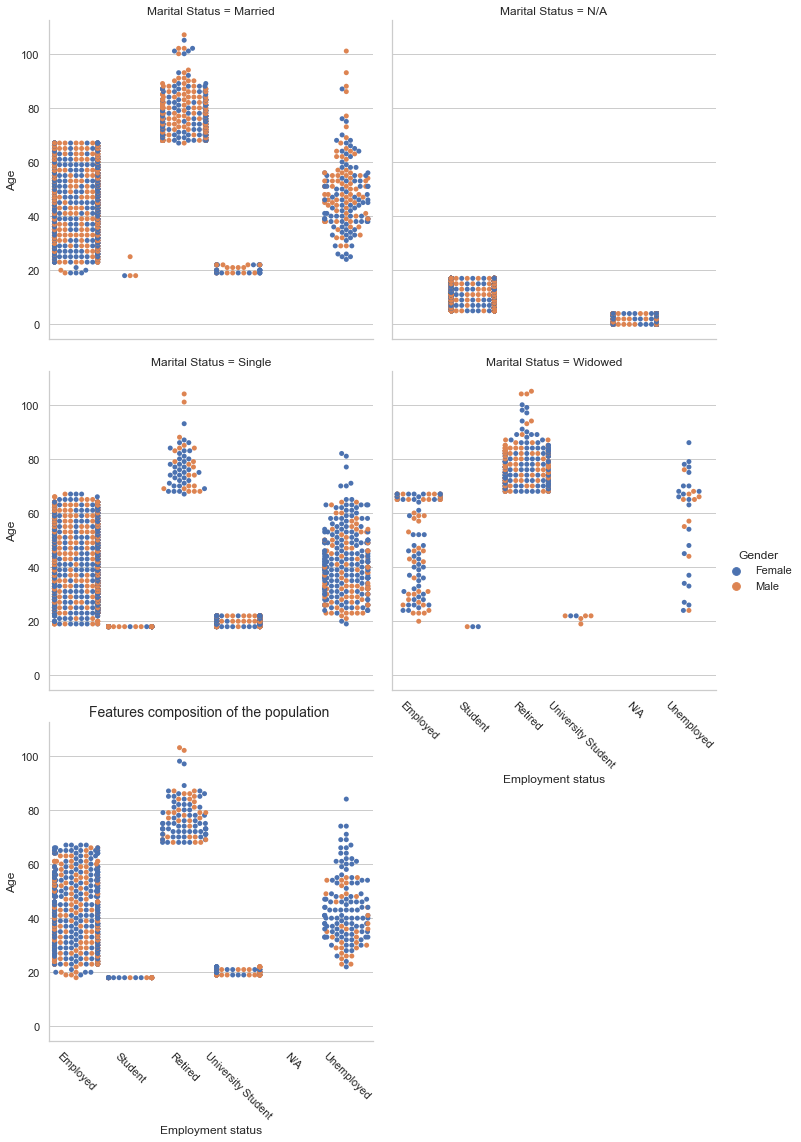

In [41]:
'''Visualize population composition'''
#define figure size
plt.figure(figsize=(10,8))
#display Facetplot
sns.set_theme(style="whitegrid")
pop= sns.catplot(col="Marital Status", y="Age", x="Employment status",
            hue="Gender",
            kind= 'swarm', col_wrap=2, data=df)
sns.set(font_scale = 1 )
pop.set_xticklabels(rotation=-45)
#set plot title
plt.title('Features composition of the population ', size= 14)

## Population Expansion

### Birth & Death Rates

In [42]:
# calculating the Fertility, birth,and Death rates of the oupulation
# On the assumption that all children where born when the women where within the age range 25- 29
#on the assumption that 


#population of children born 
babies = dfchildren[dfchildren['Age']==0]
toddlers = dfchildren[dfchildren['Age']==4]
younglings = dfchildren[dfchildren['Age']==9]
preteens = dfchildren[dfchildren['Age']==14]



#for women with 4 specific age ranges
fertile1 = dffemale[(dffemale['Age'] >= 25) & (dffemale['Age'] <= 29)]
fertile2 = dffemale[(dffemale['Age'] >= 30) & (dffemale['Age'] <= 34)]
fertile3 = dffemale[(dffemale['Age'] >= 35) & (dffemale['Age'] <= 39)]
fertile4 = dffemale[(dffemale['Age'] >= 40) & (dffemale['Age'] <= 44)]


#Age specific Fertility rate of women aged 25 to 29
fertility_rate = (len(babies)/len(fertile1))*1000

#Age specific Fertility rate of women aged 30 to 34
fertility_rate2 = (len(toddlers)/len(fertile2))*1000

#Age specific Fertility rate of women aged 30 to 34
fertility_rate2 = (len(toddlers)/len(fertile2))*1000

#Age specific Fertility rate of women aged 30 to 34
fertility_rate2 = (len(toddlers)/len(fertile2))*1000 



#The number of children born in the year per 1000 persons in the population
crude_birth_rate = (len(babies)/total_pop)*1000

#assumed population 5 years ago
pop_5 = len(df[df['Age']>4])

#birthrate 5 years ago
birthrate5 = (len(toddlers)/pop_5)*1000

print('The number of births in the population during the year are {}'.format(len(babies)))
print('The Crude Birth Rate of the population is {} per 1000 persons'.format(crude_birth_rate))
print('The Crude Birth Rate of the population 5 years ago was {} per 1000 persons'.format(birthrate5))

The number of births in the population during the year are 91
The Crude Birth Rate of the population is 9.120064141110444 per 1000 persons
The Crude Birth Rate of the population 5 years ago was 14.153453229754177 per 1000 persons


In [43]:
#assuming that only old people died

#number of people in aged population 1 yr ago - number of people in aged population currently 
current_aged =len(dfadults[(dfadults['Age'] > 65) & (dfadults['Age'] <= 107)])
aged_lastyear = len(dfadults[(dfadults['Age'] >= 64) & (dfadults['Age'] <= 106)])

#number of deaths in the last one year
deaths = aged_lastyear - current_aged 
print('The number of deaths in the population during the year are {}'.format(deaths))

#deathrate for the current year
deathrate = (deaths/total_pop)*1000 
print('The Death Rate of the population is {} per 1000 persons'.format(deathrate))


The number of deaths in the population during the year are 148
The Death Rate of the population is 14.832631789937864 per 1000 persons


## Migration

>In this study, I am determining the immigrant population by assuming that people who are lodging and visiting but are lecturers or teachers work in the local schools and at the University and may be considering settling in the town.
I am also assuming that people who are lodging or visiting and retired are looking to settle in a small peaceful town like this one.

The emmigrant population is on the assumption that for divorcees in the town, if the number of divorced men and women(since marriages were only heterosexual in 1881 ([BBC][])) are not equal, some partners have left the town during the year. 

further contributions to the emmigrant population is assuming that university students 22 or older are in their final year and the same number of people graduated the previous year and left the town for cities. The median graduating age in 1881 was between 22 and 23 years old([Mohsenin(1983)][])



[Mohsenin(1983)]: https://doi.org/10.2307/368081
[BBC]: https://www.parliament.uk/about/living-heritage/transformingsociety/private-lives/relationships/overview/lawofmarriage-/



In [44]:
#determine the occupations that indicate long term stay in the town
Teachers = [] #primary and secondary education teachers probably work at the local schools
Lecturers = [] #lecturers may live in the town and commute to the university. commonly a permanent job which prompts settling.
for job in df['Occupation']:
    if 'Teacher' in job:
        Teachers.append(str(job))
    elif 'Lecturer' in job:
        Lecturers.append(str(job))
    

In [45]:
# determine population of visitors or lodgers that might be moving permanently to the town.

temp_residents =  df[(df['Relationship to Head of House']== 'Visitor') | (df['Relationship to Head of House']== 'Lodger')]
print('The population of temporary residents is {}'.format(len(temp_residents)))

retired_temp_residents = len(temp_residents[temp_residents['Employment status']== 'Retired']) 
print('The population of retired temporary residents is {}'.format(retired_temp_residents))


temp_residents_lecturers = len(temp_residents[(temp_residents['Occupation'].isin(Lecturers)) & (temp_residents['Employment status']!='Retired')])
print('The population of temporary residents who are lecturers is {}'.format(temp_residents_lecturers))


temp_residents_teachers = len(temp_residents[(temp_residents['Occupation'].isin(Teachers)) & (temp_residents['Employment status']!='Retired')])
print('The population of temporary residents who are teachers is {}'.format(temp_residents_teachers))


#compute immigrant population
immigrants = retired_temp_residents + temp_residents_lecturers + temp_residents_teachers
print('The total population of immigrants is {}'.format(immigrants))




The population of temporary residents is 1043
The population of retired temporary residents is 0
The population of temporary residents who are lecturers is 2
The population of temporary residents who are teachers is 14
The total population of immigrants is 16


In [46]:

#check if all divorcees still live in the town
check_divorcees = len(male_divorced) == len(female_divorced)

#if output from above code is 'False', calculate number of divorcees that left town
if check_divorcees == False:
    divorcees_out = len(female_divorced) - len(male_divorced)    
print('The population of male divorcees is {} and the population of female divorcees is {}'.format(len(male_divorced), len(female_divorced)))
print('The population of divorcees who left the town is {}'.format(divorcees_out))

 
    
#compute number of university students that left town in the last year

#number of final year/graduating students
final_year_students = df[(df['Employment status'] == 'University Student') & (df['Age']>= 22 )]


#assuming that the same number of people recently graduated 
students_out = len(final_year_students)
print('The population of students who left the town is {}'.format(students_out))


#compute the number of emmigrants
emmigrants =  divorcees_out + students_out
print('The total population of emmigrants is {}'.format(emmigrants))




The population of male divorcees is 369 and the population of female divorcees is 601
The population of divorcees who left the town is 232
The population of students who left the town is 141
The total population of emmigrants is 373


**N = (I - E) / M X 1000**

Formula to calculate [Net Migration rate][]. 

I = population of immigrants

E = population of emmigrants

M = Midyear population([ Population at Start of Year + Population at End of Year ] / 2)

[Net Migration rate]: https://study.com/academy/lesson/net-migration-rate-definition-formula-statistics.html

In [47]:
#compute net migration 
Net_Migration = immigrants - emmigrants

#compute migration rate

#calculate Mid year popution

start_pop = total_pop - len(babies)
End_pop = total_pop

Midyear_pop = (start_pop + total_pop)/ 2

#Therefore:
Net_Migration_Rate = (Net_Migration/ Midyear_pop)*1000
print(Net_Migration_Rate)

-35.9426126352882


**Population increases for two reasons**([Britannica][]) -
- Natural increase (more births than deaths)
- Net Migration 
[Britannica]:https://www.britannica.com/science/population-biology-and-anthropology/Natural-increase-and-population-growth

In [48]:
natural_increase = crude_birth_rate > deathrate
if natural_increase == True:
    print('The population is expanding due to Natural increase')
elif Net_Migration_Rate > 0:
    print('The population is also expanding due to positive Net Migration Rate') 
else:
    print('The population is not expanding at all')

The population is not expanding at all


## Household Sizes


Assuming that our houses are the same sizes except for houses with lodgers which I believe are large enough that they have extra room to rent/let out.

>The average household size will determine the ideal size and any 'families'(including those with guests) with occupancies greater than the interquartile range of all household sizes will be considered over-occupied. 

The demand for low-density housing is positively indicated if the number of overpopulated households is greater than or equal to the population of households with optimum occupancy.

In [49]:
#creating the column 'House Address'
def House_Address():
    number=[num for num in df['House Number']]
    street = [name for name in df['Street']]
    House_address = []
    Address =zip(number, street)
    for i,j in Address:
        ha = i,j
        HA =','.join(ha)
        House_address.append(HA)
    return House_address

df['House Address'] = House_Address() 

In [50]:
# calculating the sizes of households including temporary residents

households = df.groupby(['House Address']).size().reset_index(name='Occupancy Count')

print('The are {} households in the town'.format(len(households)))
print('The largest household has {} occupants'.format(households['Occupancy Count'].max()))
print('The average size of an household is {}'.format(households['Occupancy Count'].mean()))
print('The most occuring household size(s) is/are {}'.format(households['Occupancy Count'].mode()))

The are 3550 households in the town
The largest household has 22 occupants
The average size of an household is 2.810704225352113
The most occuring household size(s) is/are 0    1
dtype: int64


In [51]:
lone_occupancy = households[households['Occupancy Count']==1]
lone_occupancy_percent = (len(lone_occupancy)/len(households))*100

print('{} ({}%) households contain only one occupant '.format(len(lone_occupancy), lone_occupancy_percent))


average_occupancy = households[households['Occupancy Count']<=3]
average_occupancy_percent = (len(average_occupancy)/len(households))*100

print('{} ({}%) households contain not more than 3 occupants'.format(len(average_occupancy), average_occupancy_percent))


998 (28.112676056338024%) households contain only one occupant 
2390 (67.32394366197182%) households contain not more than 3 occupants


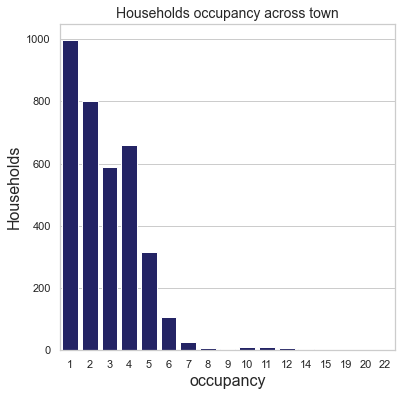

In [52]:
#define figure size
plt.figure(figsize=(6,6))
sns.set_theme(style="whitegrid")
#display countplot
households_plot = sns.countplot(data = households
            ,x = 'Occupancy Count'
            ,color = '#191970'
            )
plt.title('Households occupancy across town', size=14)
plt.ylabel('Households', size=16)
plt.xlabel('occupancy', size=16)
plt.show()

In [53]:
#computing the sizes of households including only family members

family = df[(df['Relationship to Head of House'] != 'Visitor') & (df['Relationship to Head of House'] != 'Lodger')]

families = family.groupby(['House Address']).size().reset_index(name='family Count')

print('The are {} families in the town'.format(len(families)))



The are 3550 families in the town


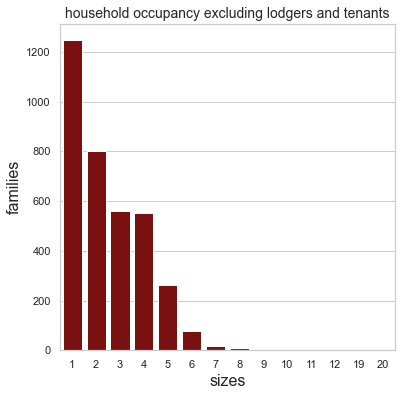

In [54]:
#define figure size
plt.figure(figsize=(6,6))
sns.set_theme(style="whitegrid")
#display countplot
families_plot = sns.countplot(data = families
            ,x = 'family Count'
            ,color = 'darkred'
            )
plt.ylabel('families', size=16)
plt.xlabel('sizes', size=16)
plt.title('household occupancy excluding lodgers and tenants', size=14)
plt.show()

In [55]:
#group by address and relationship to head of house
houses = df.groupby(['House Address', 'Relationship to Head of House']).size().reset_index(name='size')

# define households that have room to let
for title in houses['Relationship to Head of House']:
    if title == 'Lodger':
        letting_houses = houses[houses['Relationship to Head of House']== title]
        
        
#dataframe of houses without room to let
'''Only these can determine occupancy above threshold as they are households without lodgers. 
Those with lodgers are considered to have enough room and are in the optimum percentage'''
family_houses = families[~families['House Address'].isin(letting_houses['House Address'])]


In [56]:
#create column Housing type
uj=[]
for y in df['House Address']:
    if y in list(family_houses['House Address']):
        uj.append('family only')
    elif y in list(letting_houses['House Address']):
        uj.append('family&lodging')
df['Housing type'] = uj

Text(0.5, 1.0, 'housing across the population')

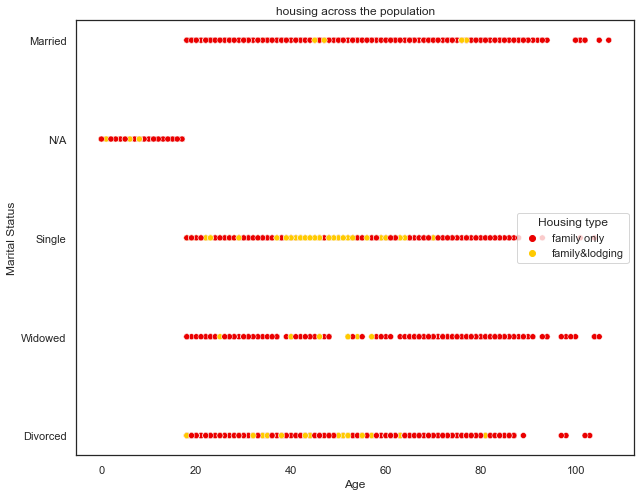

In [57]:
'''Visualize housing types across the population'''
#define figure size
plt.figure(figsize=(10,8))
sns.set_theme(style="white")
#display displot
house_types = sns.scatterplot(data= df, x='Age' ,y='Marital Status'
                              ,hue= 'Housing type', palette="hot")
plt.xlabel('Age')
plt.title('housing across the population')


In [58]:
#calculate occupancy threshold
q1= families['family Count'].quantile(0.25)
q3= families['family Count'].quantile(0.75)
IQR_households= q3-q1 

#households with threshold size
optimal = len(families[families['family Count'] == IQR_households])
optimal_percent = (optimal/len(families))*100


#overoccupied households
over_occupied = len(family_houses[family_houses['family Count'] > IQR_households])
over_occupied_percent = (over_occupied/len(households))* 100



print(optimal_percent)
print('There are {} over-occupied households in the town'.format(over_occupied))
print('The percentage of over-occupied households in the town is {}%'.format(over_occupied_percent))

if over_occupied_percent >= optimal_percent:
    print('There may be demand for large family/low-density housing')

if lone_occupancy_percent >= over_occupied_percent:
    print('Downsizing may be efficient')

15.80281690140845
There are 882 over-occupied households in the town
The percentage of over-occupied households in the town is 24.845070422535212%
There may be demand for large family/low-density housing
Downsizing may be efficient


## Commuters

>In this study, I will be determining commuters by every employed person whose occupation does not definitely indicate that they work in the town. By reason, every member of the town will travel outside the town at some point or another, However, this group has the most pressing and frequent need to go to the cities. They will likely make up most of the travelling population. 

Since most professions indicate that residents work with Hospitals, corporations and businesses in the city or that they might have a practice in the city for ease of business, Commuters will include any employed person except primary, secondary education teachers and police officers. another group to look at is university students


The productivity of the town is partially hinged on this group of the population and creates an argument for need to develop infrastucture that is beneficial to them and everyone else with a need to go out of town.
The productive population is defined as those aged 15 to 64.([WHO][])

[WHO]: https://data.oecd.org/pop/working-age-population.htm

In [59]:
#create unique key for both dataframe(to enable dataframe subtraction by key)
df['key']= [i for i in range(len(df))]

# compute the total population of medical personnels without possible private practice
not_teachers = df[(~df['Occupation'].isin(Teachers)) & (df['Employment status']=='Employed')]


# compute the total population of university students
uni_students = df[df['Employment status'] == 'University Student']

# compute population of police officers
officers = df[df['Occupation'] == 'Police officer']

#productive population
prod_pop = df[(df['Age'] >= 15) & (df['Age'] < 65)]

#calculate total population of commuters
commuters = len(uni_students) + len(not_teachers) + len(officers)
#commuters as percentage of productive population
commuters_prod_percent = (commuters/len(prod_pop))*100

print('The population of possible commuters in the town is {}'.format(commuters))
print('That is about {}% of the productive population of the town'.format(commuters_prod_percent))


The population of possible commuters in the town is 5837
That is about 85.27392257121987% of the productive population of the town


In [60]:
#define commuters
dfcommuters= pd.concat([not_teachers, uni_students, officers])
#definenoncommuters
noncommuters = df[~df.key.isin(dfcommuters.key)]

#define commute coloumn for visualization purposes
dy=[]
for y in df['key']:
    if y in list(dfcommuters['key']):
        dy.append('commuter')
    elif y in list(noncommuters['key']):
        dy.append('non commuter')
df['commute'] = dy

Text(0.5, 1.0, 'population commute')

<Figure size 864x576 with 0 Axes>

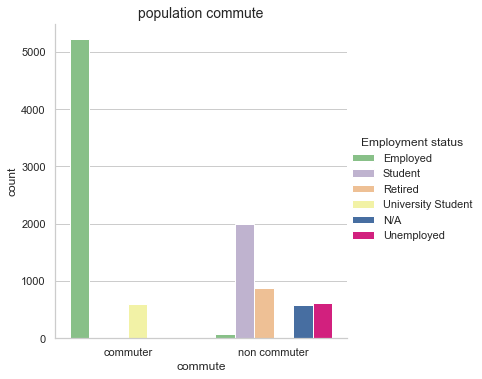

In [61]:
'''Visualise commute'''
#define figure size
plt.figure(figsize=(12,8))
sns.set_theme(style="whitegrid")
#display countplot
commute_plot = sns.catplot(x="commute", hue="Employment status", kind="count", data=df, palette="Accent")
plt.title('population commute', size = 14)

## Religious Expansion

In [62]:
'''This function generates a list of dataframes of religions'''

def lists_df(df):
    #Initialize dataframes of all religions
    Methodist = df[df['Religion']== 'Methodist']
    Christian = df[df['Religion']== 'Christian']
    Catholic = df[df['Religion']== 'Catholic']
    Sikh = df[df['Religion']== 'Sikh']
    Jewish = df[df['Religion']== 'Jewish']
    Orthodoxy = df[df['Religion']== 'Orthodoxy']
    Baptist = df[df['Religion']== 'Baptist']
    Hindu = df[df['Religion']== 'Hindu']
    Agnostic = df[df['Religion']== 'Agnostic']
    Muslim = df[df['Religion']== 'Muslim']
    N_A = df[df['Religion']== 'N/A']
    Non_Religious = df[df['Religion']== 'None']


    Religions = [Methodist, Christian, Catholic, Muslim,
       Sikh, Jewish, Orthodoxy, Baptist, Hindu, Agnostic, Non_Religious]
    return Religions

'''This returns The Mean, Median, Mode, Range and,
the Inter-Quartile Range of the age distribution of all Religions in the list generated by the previous function '''

#define function age_stats
def age_stats(df):
    for dataframe in lists_df(df):
        mean = dataframe['Age'].mean()
        median = dataframe['Age'].median()
        mode = [dataframe['Age'].mode()]
        age_range = dataframe['Age'].max() - dataframe['Age'].min()
        Q1= dataframe['Age'].quantile(0.25)
        Q3= dataframe['Age'].quantile(0.75)
        IQR=Q3-Q1
        
        print('The average age of a/an{} is {}\nThe Median age of {}s is {}\nThe modal value(s) of {} ages is/are {}\nThe age_range is {}\nThe Inter-quartile range is {}'.format(dataframe['Religion'].unique(), mean, dataframe['Religion'].unique(), median, dataframe['Religion'].unique(), mode, age_range, IQR), '\n')


In [63]:
#call function age_stats
age_statistics = age_stats(df) 
print(age_statistics)

The average age of a/an['Methodist'] is 45.65846153846154
The Median age of ['Methodist']s is 44.0
The modal value(s) of ['Methodist'] ages is/are [0    22
dtype: int32]
The age_range is 84
The Inter-quartile range is 27.0 

The average age of a/an['Christian'] is 49.563133640553
The Median age of ['Christian']s is 51.0
The modal value(s) of ['Christian'] ages is/are [0    55
dtype: int32]
The age_range is 87
The Inter-quartile range is 26.75 

The average age of a/an['Catholic'] is 42.92314990512334
The Median age of ['Catholic']s is 41.0
The modal value(s) of ['Catholic'] ages is/are [0    40
dtype: int32]
The age_range is 87
The Inter-quartile range is 17.0 

The average age of a/an['Muslim'] is 35.698113207547166
The Median age of ['Muslim']s is 32.0
The modal value(s) of ['Muslim'] ages is/are [0    28
dtype: int32]
The age_range is 65
The Inter-quartile range is 14.75 

The average age of a/an['Sikh'] is 34.08064516129032
The Median age of ['Sikh']s is 30.0
The modal value(s) of 

In [64]:
#quick get descriptive statistics of ages across all Religions
df.groupby('Religion')['Age'].describe(percentiles=[])

,count,mean,std,min,50%,max
Religion,,,,,,
Agnostic,1.0,24.000000,NaN,24.0,24.0,24.0
Baptist,2.0,36.000000,9.899495,29.0,36.0,43.0
Catholic,1054.0,42.923150,15.537742,18.0,41.0,105.0
Christian,2170.0,49.563134,17.977290,18.0,51.0,105.0
Hindu,1.0,80.000000,NaN,80.0,80.0,80.0
Jewish,37.0,40.702703,12.337533,21.0,41.0,68.0
Methodist,650.0,45.658462,18.025926,18.0,44.0,102.0
Muslim,106.0,35.698113,14.041550,19.0,32.0,84.0
N/A,2454.0,8.909535,5.019323,0.0,9.0,17.0


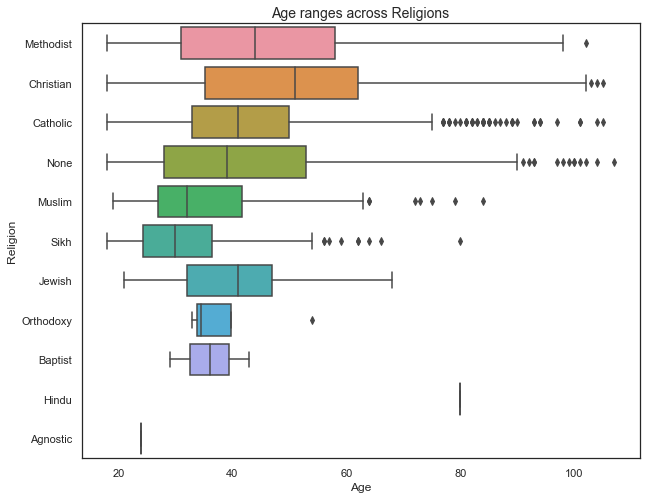

In [65]:
'''Visualize Range and Median Ages across all Religions'''
#define figure size
plt.figure(figsize=(10,8))
sns.set_theme(style="white")
#display boxplot
rels = sns.boxplot(data = dfadults , x=dfadults['Age'], y=dfadults['Religion'] )
plt.title('Age ranges across Religions', size= 14)
plt.show()

In [66]:
'''to predict population of new religious in TEN years.
Birth rate and future births will not be factored in because,
all new borns will be less than 16 in 10years and expected not to have a religion '''

#children included in below list because they could be parents too
possible_parents= ['Head', 'Husband', 'Son', 'Daughter',
       'Step-Daughter', 'Step-Son', 'Wife', 'Grandson', 'Partner',
       'Sibling', 'Adopted Daughter', 'Cousin', 'Niece', 'Nephew',

                   'Adopted Son', 'Son-in-law', 'Daughter-in-law'] 

#possibly parents and may have a religion
parents = family[(family['Relationship to Head of House'].isin(possible_parents) & (family['Age']> 18))]

#new age of children for religion prediction

dfchildren = df[df["Age"] <18] #update dataframe of children
new_age =[]
for age in dfchildren['Age']:
    age = age +10
    new_age.append(age)
dfchildren['Age']= new_age

#define prediction data(age 16 band for religion)
future_adults = dfchildren[dfchildren['Age']> 16 ]
#write prediction data to csv
pd.DataFrame.to_csv(future_adults, './children.csv', sep=',', index=False)

#write training data to csv(x_train,y_train)
pd.DataFrame.to_csv(parents, './parents.csv', sep=',', index=False)


In [67]:
'''The following model is trained to understand how often religions are transmitted among generations in a household
and will be used to predict which religions will increase in 10 ten years.

The data has been filtered based on respondents relationship to the head of house and their households. 
The data to train and test the model before attempting prediction contains information on ages of people and their religion.

the predicting dataset is children in the population in 10 years time'''

#importing relevant mofu 
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score


#read in train data
train=pd.read_csv('parents.csv'
                    , usecols = ['Religion', 'Age', 'Relationship to Head of House', 'House Address'])
   
#define set and label
x= train.drop(['Religion'], axis=1)
y= train['Religion']

#split train and validation data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.20, random_state=20)

cat_features =['Relationship to Head of House', 'House Address']


In [68]:
#initialize model
CBClassifier= CatBoostClassifier(n_estimators=1000, learning_rate=0.01, depth = 8)
#fit model
CBClassifier.fit(x_train, y_train, cat_features = cat_features )


0:	learn: 2.2795059	total: 197ms	remaining: 3m 17s
1:	learn: 2.2574668	total: 225ms	remaining: 1m 52s
2:	learn: 2.2357519	total: 381ms	remaining: 2m 6s
3:	learn: 2.2160721	total: 435ms	remaining: 1m 48s
4:	learn: 2.1966262	total: 491ms	remaining: 1m 37s
5:	learn: 2.1784916	total: 509ms	remaining: 1m 24s
6:	learn: 2.1609894	total: 526ms	remaining: 1m 14s
7:	learn: 2.1443275	total: 637ms	remaining: 1m 19s
8:	learn: 2.1275429	total: 839ms	remaining: 1m 32s
9:	learn: 2.1111845	total: 949ms	remaining: 1m 33s
10:	learn: 2.0954052	total: 1s	remaining: 1m 30s
11:	learn: 2.0792584	total: 1.11s	remaining: 1m 31s
12:	learn: 2.0637554	total: 1.17s	remaining: 1m 28s
13:	learn: 2.0491463	total: 1.37s	remaining: 1m 36s
14:	learn: 2.0351533	total: 1.42s	remaining: 1m 33s
15:	learn: 2.0212179	total: 1.46s	remaining: 1m 29s
16:	learn: 2.0080922	total: 1.51s	remaining: 1m 27s
17:	learn: 1.9952754	total: 1.54s	remaining: 1m 23s
18:	learn: 1.9827665	total: 1.78s	remaining: 1m 32s
19:	learn: 1.9706770	total

158:	learn: 1.2275968	total: 19.8s	remaining: 1m 44s
159:	learn: 1.2255675	total: 20s	remaining: 1m 44s
160:	learn: 1.2238968	total: 20s	remaining: 1m 44s
161:	learn: 1.2219151	total: 20.3s	remaining: 1m 44s
162:	learn: 1.2200026	total: 20.6s	remaining: 1m 45s
163:	learn: 1.2181075	total: 20.8s	remaining: 1m 45s
164:	learn: 1.2164094	total: 20.8s	remaining: 1m 45s
165:	learn: 1.2145297	total: 20.9s	remaining: 1m 45s
166:	learn: 1.2126084	total: 21.1s	remaining: 1m 45s
167:	learn: 1.2107252	total: 21.3s	remaining: 1m 45s
168:	learn: 1.2088821	total: 21.6s	remaining: 1m 46s
169:	learn: 1.2070413	total: 21.7s	remaining: 1m 46s
170:	learn: 1.2053397	total: 21.9s	remaining: 1m 46s
171:	learn: 1.2036178	total: 22.1s	remaining: 1m 46s
172:	learn: 1.2019226	total: 22.3s	remaining: 1m 46s
173:	learn: 1.2002176	total: 22.4s	remaining: 1m 46s
174:	learn: 1.1984765	total: 22.6s	remaining: 1m 46s
175:	learn: 1.1974078	total: 22.6s	remaining: 1m 45s
176:	learn: 1.1957862	total: 22.8s	remaining: 1m 4

315:	learn: 1.0839070	total: 44.1s	remaining: 1m 35s
316:	learn: 1.0834785	total: 44.3s	remaining: 1m 35s
317:	learn: 1.0831215	total: 44.5s	remaining: 1m 35s
318:	learn: 1.0828086	total: 44.8s	remaining: 1m 35s
319:	learn: 1.0823774	total: 44.9s	remaining: 1m 35s
320:	learn: 1.0819679	total: 45.1s	remaining: 1m 35s
321:	learn: 1.0816150	total: 45.2s	remaining: 1m 35s
322:	learn: 1.0813716	total: 45.2s	remaining: 1m 34s
323:	learn: 1.0810838	total: 45.3s	remaining: 1m 34s
324:	learn: 1.0807152	total: 45.6s	remaining: 1m 34s
325:	learn: 1.0805045	total: 45.6s	remaining: 1m 34s
326:	learn: 1.0800887	total: 45.9s	remaining: 1m 34s
327:	learn: 1.0797733	total: 46s	remaining: 1m 34s
328:	learn: 1.0794022	total: 46.2s	remaining: 1m 34s
329:	learn: 1.0790683	total: 46.6s	remaining: 1m 34s
330:	learn: 1.0788689	total: 46.6s	remaining: 1m 34s
331:	learn: 1.0784673	total: 46.8s	remaining: 1m 34s
332:	learn: 1.0781788	total: 47s	remaining: 1m 34s
333:	learn: 1.0778457	total: 47.2s	remaining: 1m 3

472:	learn: 1.0495408	total: 1m 8s	remaining: 1m 16s
473:	learn: 1.0494707	total: 1m 8s	remaining: 1m 16s
474:	learn: 1.0493730	total: 1m 8s	remaining: 1m 16s
475:	learn: 1.0493150	total: 1m 8s	remaining: 1m 15s
476:	learn: 1.0492635	total: 1m 8s	remaining: 1m 15s
477:	learn: 1.0490797	total: 1m 9s	remaining: 1m 15s
478:	learn: 1.0489373	total: 1m 9s	remaining: 1m 15s
479:	learn: 1.0488123	total: 1m 9s	remaining: 1m 15s
480:	learn: 1.0487624	total: 1m 9s	remaining: 1m 15s
481:	learn: 1.0487132	total: 1m 9s	remaining: 1m 15s
482:	learn: 1.0486114	total: 1m 10s	remaining: 1m 14s
483:	learn: 1.0485631	total: 1m 10s	remaining: 1m 14s
484:	learn: 1.0484483	total: 1m 10s	remaining: 1m 14s
485:	learn: 1.0482834	total: 1m 10s	remaining: 1m 14s
486:	learn: 1.0481793	total: 1m 10s	remaining: 1m 14s
487:	learn: 1.0481326	total: 1m 10s	remaining: 1m 14s
488:	learn: 1.0480592	total: 1m 10s	remaining: 1m 13s
489:	learn: 1.0478817	total: 1m 10s	remaining: 1m 13s
490:	learn: 1.0477312	total: 1m 11s	re

628:	learn: 1.0339683	total: 1m 35s	remaining: 56.1s
629:	learn: 1.0339226	total: 1m 35s	remaining: 55.9s
630:	learn: 1.0338532	total: 1m 35s	remaining: 55.8s
631:	learn: 1.0338037	total: 1m 35s	remaining: 55.6s
632:	learn: 1.0337145	total: 1m 35s	remaining: 55.5s
633:	learn: 1.0336981	total: 1m 35s	remaining: 55.3s
634:	learn: 1.0336433	total: 1m 35s	remaining: 55.2s
635:	learn: 1.0336229	total: 1m 36s	remaining: 55s
636:	learn: 1.0335556	total: 1m 36s	remaining: 54.9s
637:	learn: 1.0333717	total: 1m 36s	remaining: 54.8s
638:	learn: 1.0332892	total: 1m 36s	remaining: 54.6s
639:	learn: 1.0332553	total: 1m 36s	remaining: 54.4s
640:	learn: 1.0331897	total: 1m 36s	remaining: 54.3s
641:	learn: 1.0331494	total: 1m 37s	remaining: 54.1s
642:	learn: 1.0330964	total: 1m 37s	remaining: 54s
643:	learn: 1.0330495	total: 1m 37s	remaining: 53.9s
644:	learn: 1.0330189	total: 1m 37s	remaining: 53.7s
645:	learn: 1.0329700	total: 1m 37s	remaining: 53.5s
646:	learn: 1.0328745	total: 1m 37s	remaining: 53.

784:	learn: 1.0228339	total: 2m 1s	remaining: 33.4s
785:	learn: 1.0228178	total: 2m 2s	remaining: 33.2s
786:	learn: 1.0227353	total: 2m 2s	remaining: 33.1s
787:	learn: 1.0226929	total: 2m 2s	remaining: 32.9s
788:	learn: 1.0226374	total: 2m 2s	remaining: 32.8s
789:	learn: 1.0226276	total: 2m 2s	remaining: 32.6s
790:	learn: 1.0226210	total: 2m 2s	remaining: 32.4s
791:	learn: 1.0225731	total: 2m 2s	remaining: 32.3s
792:	learn: 1.0225327	total: 2m 3s	remaining: 32.1s
793:	learn: 1.0224700	total: 2m 3s	remaining: 31.9s
794:	learn: 1.0224045	total: 2m 3s	remaining: 31.8s
795:	learn: 1.0223759	total: 2m 3s	remaining: 31.6s
796:	learn: 1.0223562	total: 2m 3s	remaining: 31.5s
797:	learn: 1.0223127	total: 2m 3s	remaining: 31.3s
798:	learn: 1.0222622	total: 2m 3s	remaining: 31.2s
799:	learn: 1.0220780	total: 2m 4s	remaining: 31s
800:	learn: 1.0220717	total: 2m 4s	remaining: 30.8s
801:	learn: 1.0219848	total: 2m 4s	remaining: 30.7s
802:	learn: 1.0219096	total: 2m 4s	remaining: 30.6s
803:	learn: 1.

940:	learn: 1.0103830	total: 2m 35s	remaining: 9.76s
941:	learn: 1.0103071	total: 2m 35s	remaining: 9.6s
942:	learn: 1.0102442	total: 2m 36s	remaining: 9.44s
943:	learn: 1.0101537	total: 2m 36s	remaining: 9.27s
944:	learn: 1.0101400	total: 2m 36s	remaining: 9.11s
945:	learn: 1.0100930	total: 2m 36s	remaining: 8.94s
946:	learn: 1.0100095	total: 2m 36s	remaining: 8.78s
947:	learn: 1.0099404	total: 2m 37s	remaining: 8.62s
948:	learn: 1.0098314	total: 2m 37s	remaining: 8.46s
949:	learn: 1.0097006	total: 2m 37s	remaining: 8.3s
950:	learn: 1.0095749	total: 2m 37s	remaining: 8.14s
951:	learn: 1.0094629	total: 2m 38s	remaining: 7.97s
952:	learn: 1.0093868	total: 2m 38s	remaining: 7.81s
953:	learn: 1.0093337	total: 2m 38s	remaining: 7.65s
954:	learn: 1.0092905	total: 2m 38s	remaining: 7.48s
955:	learn: 1.0091823	total: 2m 39s	remaining: 7.32s
956:	learn: 1.0090729	total: 2m 39s	remaining: 7.16s
957:	learn: 1.0089378	total: 2m 39s	remaining: 7s
958:	learn: 1.0088641	total: 2m 39s	remaining: 6.83

In [69]:
#predict test religions
y_pred = CBClassifier.predict(x_test)
y_pred

array([['Christian'],
       ['Christian'],
       ['Catholic'],
       ...,
       ['None'],
       ['None'],
       ['Methodist']], dtype=object)

In [70]:
#check accuracy
accuracy_score(y_test , y_pred)

0.6711356466876972

In [71]:
''' 67% accuracy is not a great score but after many training attempts and with different classifiers, I accepted the model's performance'''
# read in prediction data
test = pd.read_csv('children.csv'
                        , usecols = ['Age', 'Relationship to Head of House', 'House Address'])
#predict religion of children population
predictions = CBClassifier.predict(test)

ten_years = pd.read_csv('children.csv')
ten_years['Religion'] = predictions

#predictive statistics of Religions in children population in 10 years
ten_years.groupby('Religion')['Age'].describe(percentiles=[])

,count,mean,std,min,50%,max
Religion,,,,,,
Catholic,217.0,21.705069,3.297814,17.0,22.0,27.0
Christian,426.0,22.596244,3.246194,17.0,23.0,27.0
Methodist,144.0,21.805556,3.082270,17.0,21.0,27.0
None,806.0,21.710918,3.149612,17.0,22.0,27.0


In [72]:
age_statistics = age_stats(ten_years) 

The average age of a/an['Methodist'] is 21.805555555555557
The Median age of ['Methodist']s is 21.0
The modal value(s) of ['Methodist'] ages is/are [0    21
dtype: int64]
The age_range is 10
The Inter-quartile range is 5.25 

The average age of a/an['Christian'] is 22.5962441314554
The Median age of ['Christian']s is 23.0
The modal value(s) of ['Christian'] ages is/are [0    27
dtype: int64]
The age_range is 10
The Inter-quartile range is 5.75 

The average age of a/an['Catholic'] is 21.705069124423964
The Median age of ['Catholic']s is 22.0
The modal value(s) of ['Catholic'] ages is/are [0    17
dtype: int64]
The age_range is 10
The Inter-quartile range is 5.0 

The average age of a/an[] is nan
The Median age of []s is nan
The modal value(s) of [] ages is/are [Series([], dtype: int64)]
The age_range is nan
The Inter-quartile range is nan 

The average age of a/an[] is nan
The Median age of []s is nan
The modal value(s) of [] ages is/are [Series([], dtype: int64)]
The age_range is nan


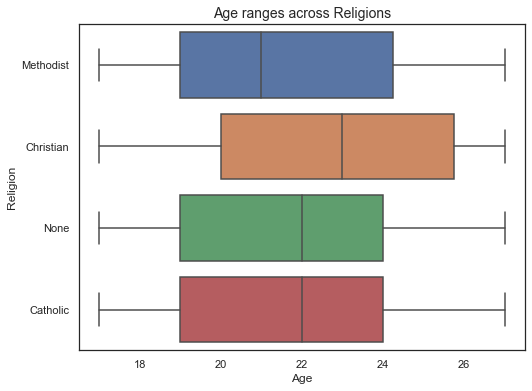

In [73]:
'''Visualize Range and Median Ages across all Religions'''
#define figure size
plt.figure(figsize=(8,6))
sns.set_theme(style="white")
#display boxplot
new_rels = sns.boxplot(data = ten_years , x=ten_years['Age'], y=ten_years['Religion'] )
plt.title('Age ranges across Religions', size= 14)
plt.show()

## Emergencies

possible emergencies will be determined by the number of possible births(pregnancies) in the next five years and the number of young children and aged people(accident prone group) projected to be in the population in the next five years.

"Children under the age of five years and people in later life (those over the age of 65, and particularly those over 75) are most likely to have an accident at home"

The assumption of previous and present population with age groups will also hold in this case

Calculation of Future Population([PopulationU][]).

## If a constant rate of growth be R% per annum, then population after n years = 
## P x (1+R/100)n.

According to uoregon, Calculating Population percent growth rates(R%), the percent change from one period to another is calculated from the formula:

# PR = ((VPr - Vpa)/VPa) x 100

Where PR is Percent Rate, VPr is Present or Future Value, VPa is Past or Present Value, The annual percentage growth rate is simply the percent growth divided by N, the number of years.



[PopulationU]: https://www.populationu.com/gen/population-formula 


In [74]:
'''annual percentage growth rate of entire population'''

#current population
current_pop = total_pop

#population a year ago
previous_pop = len(df[(df['Age'] > 0) & (df['Age'] <=106)])

PR = ((current_pop - previous_pop)/previous_pop)* 100
print('The percentage growth rate of the population is {}%'.format(PR), '\n')

'''percentage growth rate of entire population across 10 years'''

pop_projection1 = total_pop*((1 + (PR/100))**1)
print('The population of the town is projected to be {} in one year based on a growth rate of {}%'.format(pop_projection1, PR), '\n')

pop_projection5 = total_pop*((1 + (PR/100))**5)
print('The population of the town is projected to be {} in five years based on a growth rate of {}%'.format(pop_projection5, PR), '\n')

pop_projection10 = total_pop*((1 + (PR/100))**10)
print('The population of the town is projected to be {} in 10 years based on a growth rate of {}%'.format(pop_projection10, PR), '\n')


'''annual percentage growth rate of infant and toddler population'''

#current population of 0-5 year olds
young_children = len(df[(df['Age'] >= 0) & (df['Age'] <=5)])

#population of young_children a year ago
previous_young = len(df[(df['Age'] >=1) & (df['Age'] <=4)])
young_PR = ((young_children - previous_young)/previous_young)* 100

print('The population of children ages 0-5 is expected to grow at a rate of {}% per year'.format(young_PR), '\n')

young_projection1 = young_children*((1 + (young_PR/100))**1)
print('The population of children ages 0-5 in the town is projected to be {} in one year based on a growth rate of {}%. Their current population is {}'.format(young_projection1, young_PR, young_children), '\n')

young_projection = young_children*((1 + (young_PR/100))**5)
print('The population of children ages 0-5 in the town is projected to be {} in five years based on a growth rate of {}%. Their current population is {}'.format(young_projection, young_PR, young_children), '\n')



'''projected number of pregnancies in 1year'''
#(crude_birth_rate/1000) projected population

future_births1 = (crude_birth_rate/1000)*pop_projection1
print('The expected number of pregnancies/births in the next one years is projected to be {}'.format(future_births1), '\n')

'''projected aged population'''
aged_PR = ((current_aged - aged_lastyear)/aged_lastyear)* 100

aged_projection1 = current_aged*((1 + (aged_PR/100))**1)
print('The population of adults aged 65 and above in the town is projected to be {} in one year based on a growth rate of {}%. Their current population is {}'.format(aged_projection1, aged_PR, current_aged), '\n')



total_injury_prone = ((future_births1 + young_projection1 + aged_projection1)/ pop_projection1)* 100
print('About {}% of the total population will account for emergencies in the town during the next one year'.format(total_injury_prone))

The percentage growth rate of the population is 0.9306089419380943% 

The population of the town is projected to be 10070.856160226584 in one year based on a growth rate of 0.9306089419380943% 

The population of the town is projected to be 10451.00286981228 in five years based on a growth rate of 0.9306089419380943% 

The population of the town is projected to be 10946.428240611798 in 10 years based on a growth rate of 0.9306089419380943% 

The population of children ages 0-5 is expected to grow at a rate of 46.326530612244895% per year 

The population of children ages 0-5 in the town is projected to be 1049.1612244897958 in one year based on a growth rate of 46.326530612244895%. Their current population is 717 

The population of children ages 0-5 in the town is projected to be 4809.883238544803 in five years based on a growth rate of 46.326530612244895%. Their current population is 717 

The expected number of pregnancies/births in the next one years is projected to be 91.846854137

In [75]:
infirmity = len(df[df['Infirmity'] != 'None'])
infirmity_percent = (infirmity/total_pop)*100
print('{}% of the population have infirmities'.format(infirmity_percent))

0.661455201443175% of the population have infirmities


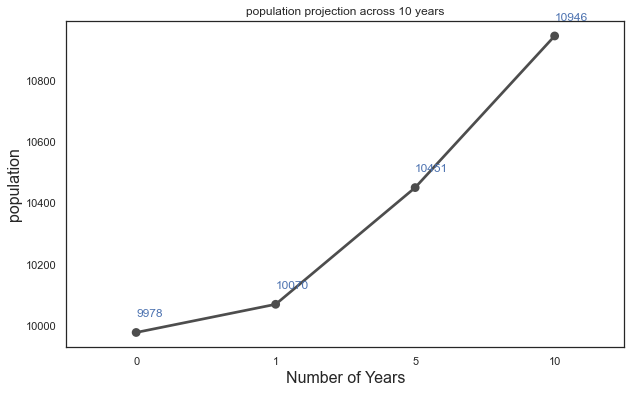

In [76]:
#define figure size
plt.figure(figsize=(10,6))
years = [0, 1 ,5, 10]
population =[9978, 10070, 10451, 10946]
pro_pop = sns.pointplot(x= years, y=population, color='.3')
[pro_pop.text(p[0], p[1]+50, p[1], color='b') for p in zip(pro_pop.get_xticks(), population)]
sns.set_theme(style="whitegrid")
plt.ylabel('population', size=16)
plt.xlabel('Number of Years', size=16)

plt.title('population projection across 10 years', size = 12)
plt.show()

##  Employment & Training

Unemployment rate of the population  will be calculated to determine the levels of employment and if training will be needed.

>The headline measure of unemployment for the UK is the unemployment rate for those aged 16 and over. Unemployment rates are calculated, in accordance with international guidelines, as the number of unemployed people divided by the economically active population (those in employment plus those who are unemployed).[ONS][]

[ONS]:
https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/employmentandemployeetypes/methodologies/aguidetolabourmarketstatistics

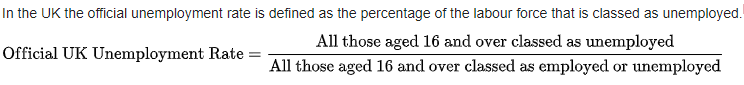

In [77]:
#determine the percentage of the population with different employment statuses(for table visual)
retired_percent= (len(df[df['Employment status']== 'Retired'])/total_pop)*100
unemployed_percent = (len(df[df['Employment status']== 'Unemployed'])/total_pop)*100
employed_percent = (len(df[df['Employment status']== 'Employed'])/total_pop)*100
student_percent= (len(df[df['Employment status']== 'Student'])/total_pop)*100
uni_stu_percent= (len(df[df['Employment status']== 'University Student'])/total_pop)*100
under_aged_percent = (len(df[df['Employment status']== 'N/A'])/total_pop)*100


print('\nretired_percent:', retired_percent, '\nunemployed_percent:', unemployed_percent, '\nemployed_percent:', employed_percent,'\nstudent_percent:', student_percent, '\nuni_stu_percent:', uni_stu_percent, '\nunder_aged_percent:', under_aged_percent)


retired_percent: 8.819402685909001 
unemployed_percent: 6.253758268190018 
employed_percent: 53.09681298857486 
student_percent: 20.05411906193626 
uni_stu_percent: 5.9530968129885755 
under_aged_percent: 5.822810182401283


In [78]:
unemployed_pop = len(df[(df['Age'] > 16) & (df['Employment status'] == 'Unemployed')])
employed_pop = len(df[(df['Age'] > 16) & (df['Employment status'] == 'Employed')])

unemployment_rate = (unemployed_pop/(unemployed_pop + employed_pop))*100
print('The unemployment rate in the labour force of the town is {}%'.format(unemployment_rate))
#print('The town has a low unemployment rate')


The unemployment rate in the labour force of the town is 10.536980749746707%


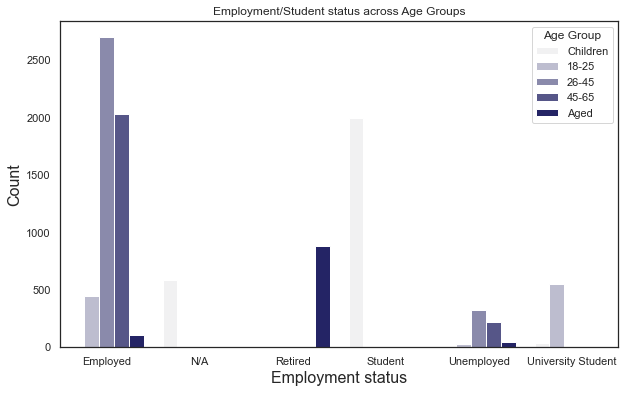

In [79]:
statuses = df.groupby(['Age Group', 'Employment status']).size().reset_index(name='status count')
#define figure size
plt.figure(figsize=(10,6))
sns.set_theme(style="white")
#display barplot
Emp_sts = sns.barplot(y='status count', x='Employment status', data=statuses, hue = 'Age Group', color = '#191970' )
plt.ylabel('Count', size=16)
plt.xlabel('Employment status', size=16)
plt.title('Employment/Student status across Age Groups', size=12)
plt.show()


## Old Age care
The five year projected population of aged people/retirees will be calculated using methods slightly different from the computation for the total population. 

The current age group 59-64 will be considered the next generation of aged and the total population in five years will be the sum of the current and next population of aged people minus the total expected deaths based on the deathrate of the population.

In [80]:
aged = current_aged 
#calculating then number of expected deaths over 5 years from the current aged pop using the current death rate
aged_deaths = (deathrate/1000)*aged #number of deaths in aged population
aged_deaths = aged_deaths*5 #number of deaths in 5 years
print('{} number of people are expected to die in five years'.format(aged_deaths))

#population of aged people minus expected deaths
new_aged = aged - aged_deaths #difference in aged population in five years

#future population of aged(5yrs) 
next_gen_aged = len(df[(df['Age'] >= 59) & (df['Age'] < 65)]) # aged 65 and above in 5 years
aged_projection5 = next_gen_aged +  new_aged #total population of aged people in 5 years

if aged_projection5 > aged: #if population of aged people in 5years is greater than current aged population
    aged_increase = aged_projection5 - new_aged #compute population difference
    print('There is evidence that the population of the aged will increase by at least {} people within the next five years'.format(aged_increase))
else:
    print('There is currently no evidence of an expected increase in the population of aged people in the town')

print(deathrate, aged_deaths, aged, aged_projection5)
print('The population of adults aged 65 and above in the town is projected to be {} in five years. Their current population is {}'.format(aged_projection5, current_aged), '\n')


76.83303267187813 number of people are expected to die in five years
There is evidence that the population of the aged will increase by at least 514.0 people within the next five years
14.832631789937864 76.83303267187813 1036 1473.166967328122
The population of adults aged 65 and above in the town is projected to be 1473.166967328122 in five years. Their current population is 1036 



## School Aged children

In [81]:
#current population of school aged children and potential school children(infants & toddlers)
school_children = len(dfchildren[(dfchildren['Age'] >= 0) & (dfchildren['Age'] <= 16)])

#population of school aged_children and potential school children from last year 
last_school_children = len(dfchildren[(dfchildren['Age'] >= 1) & (dfchildren['Age'] <= 17)])

if school_children > last_school_children:
    increase = school_children - last_school_children
    print('The population of school children and potential school children increased by {} in the last one year'.format(increase))
else:
    print('The population of school children and potential school children did not increase in the past year')

#population of school children and potential school children
#previous_school_children = len(dfchildren[(dfchildren['Age'] > 0) & (dfchildren['Age'] <=15)])

#compute the growth rate of school children and potential school children 
school_children_PR = ((school_children - last_school_children)/last_school_children)* 100

print('The population of school children and potential school children is expected to grow at a rate of {}% per year'.format(school_children_PR))

school_children_proj1 = school_children*((1 + (school_children_PR/100))**1)
print('The population of school children and potential school children in the town is projected to be {} in one year based on a growth rate of {}%. Their current population is {}'.format(school_children_proj1, school_children_PR, school_children), '\n')
school_children_proj5 = school_children*((1 + (school_children_PR/100))**5)
print('The population of school children and potential school children in the town is projected to be {} in five years based on a growth rate of {}%. Their current population is {}'.format(school_children_proj5, school_children_PR, school_children), '\n')
school_children_proj10 = school_children*((1 + (school_children_PR/100))**10)
print('The population of school children and potential school children in the town is projected to be {} in ten years based on a growth rate of {}%. Their current population is {}'.format(school_children_proj10, school_children_PR, school_children))
print(last_school_children)

The population of school children and potential school children did not increase in the past year
The population of school children and potential school children is expected to grow at a rate of -15.004935834155972% per year
The population of school children and potential school children in the town is projected to be 731.8075024679171 in one year based on a growth rate of -15.004935834155972%. Their current population is 861 

The population of school children and potential school children in the town is projected to be 381.91936705690097 in five years based on a growth rate of -15.004935834155972%. Their current population is 861 

The population of school children and potential school children in the town is projected to be 169.41045636834357 in ten years based on a growth rate of -15.004935834155972%. Their current population is 861
1013


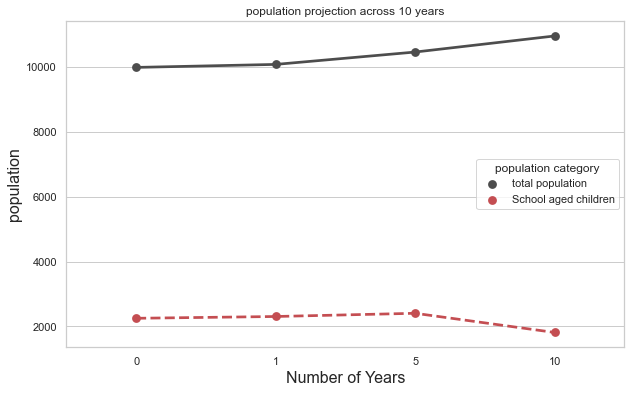

In [82]:
#visualize projection of school children with total population
years = [ 0, 1 ,5, 10, 0, 1, 5, 10]
pops =[9978, 10070, 10451, 10946, 2252, 2307, 2406, 1815]
pops_order = ['total population', 'total population', 'total population', 'total population', 'School aged children', 'School aged children', 'School aged children', 'School aged children']
proj_df= pd.DataFrame({'Year':years, 'population': pops,'population category': pops_order})
#define figure size
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
proj_plot = sns.pointplot(x="Year", y="population", hue="population category",
            palette={"total population": ".3", "School aged children": "r"},
            markers=["o", "o"], linestyles=["-", "--"],
            data=proj_df)
plt.ylabel('population', size=16)
plt.xlabel('Number of Years', size=16)
plt.title('population projection across 10 years', size = 12)
plt.show()

In [83]:
#Define a function to save plots as images
def save_plot(file_paths, figures): #accepts list of file paths and a list of figures
    figs_to_save = {} #create an empty dictionary
    for i,j in zip(file_paths, figures):
        figs_to_save[i]= j #assign file path as key and figure as value and populate figs_to_save
    for file_path, figure in figs_to_save.items(): #for items in figs_to_save
        try:
            figure.savefig(file_path) #save figure to file path
        except AttributeError: #process attribute error if figure is not a FacetGrid object
            figure.get_figure().savefig(file_path) #attempt saving again
            
    return 'The plots have been saved' #confirm completion
        
paths = ["./households.png", "./families.png", "./pro_pop.png", "./Emp_sts.png", "./rels.png", "./commute_plot.png", "./pop.png",
        "./proj_plot.png", "./house_types.png", "./new_rel.png"]
plots = [households_plot, families_plot, pro_pop, Emp_sts, rels, commute_plot, pop, proj_plot, house_types, new_rels]
save_plot(paths, plots)

'The plots have been saved'